In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics

In [6]:
df =  pd.read_csv('./data/application_train.csv')

In [8]:
list(df.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [39]:
colfordummies = df.select_dtypes(include='object').columns

In [41]:
df_w_dumm = pd.get_dummies(df, prefix=colfordummies)

In [45]:
df_w_dumm_nafill = df_w_dumm.fillna(df_w_dumm.mean())

<AxesSubplot:>

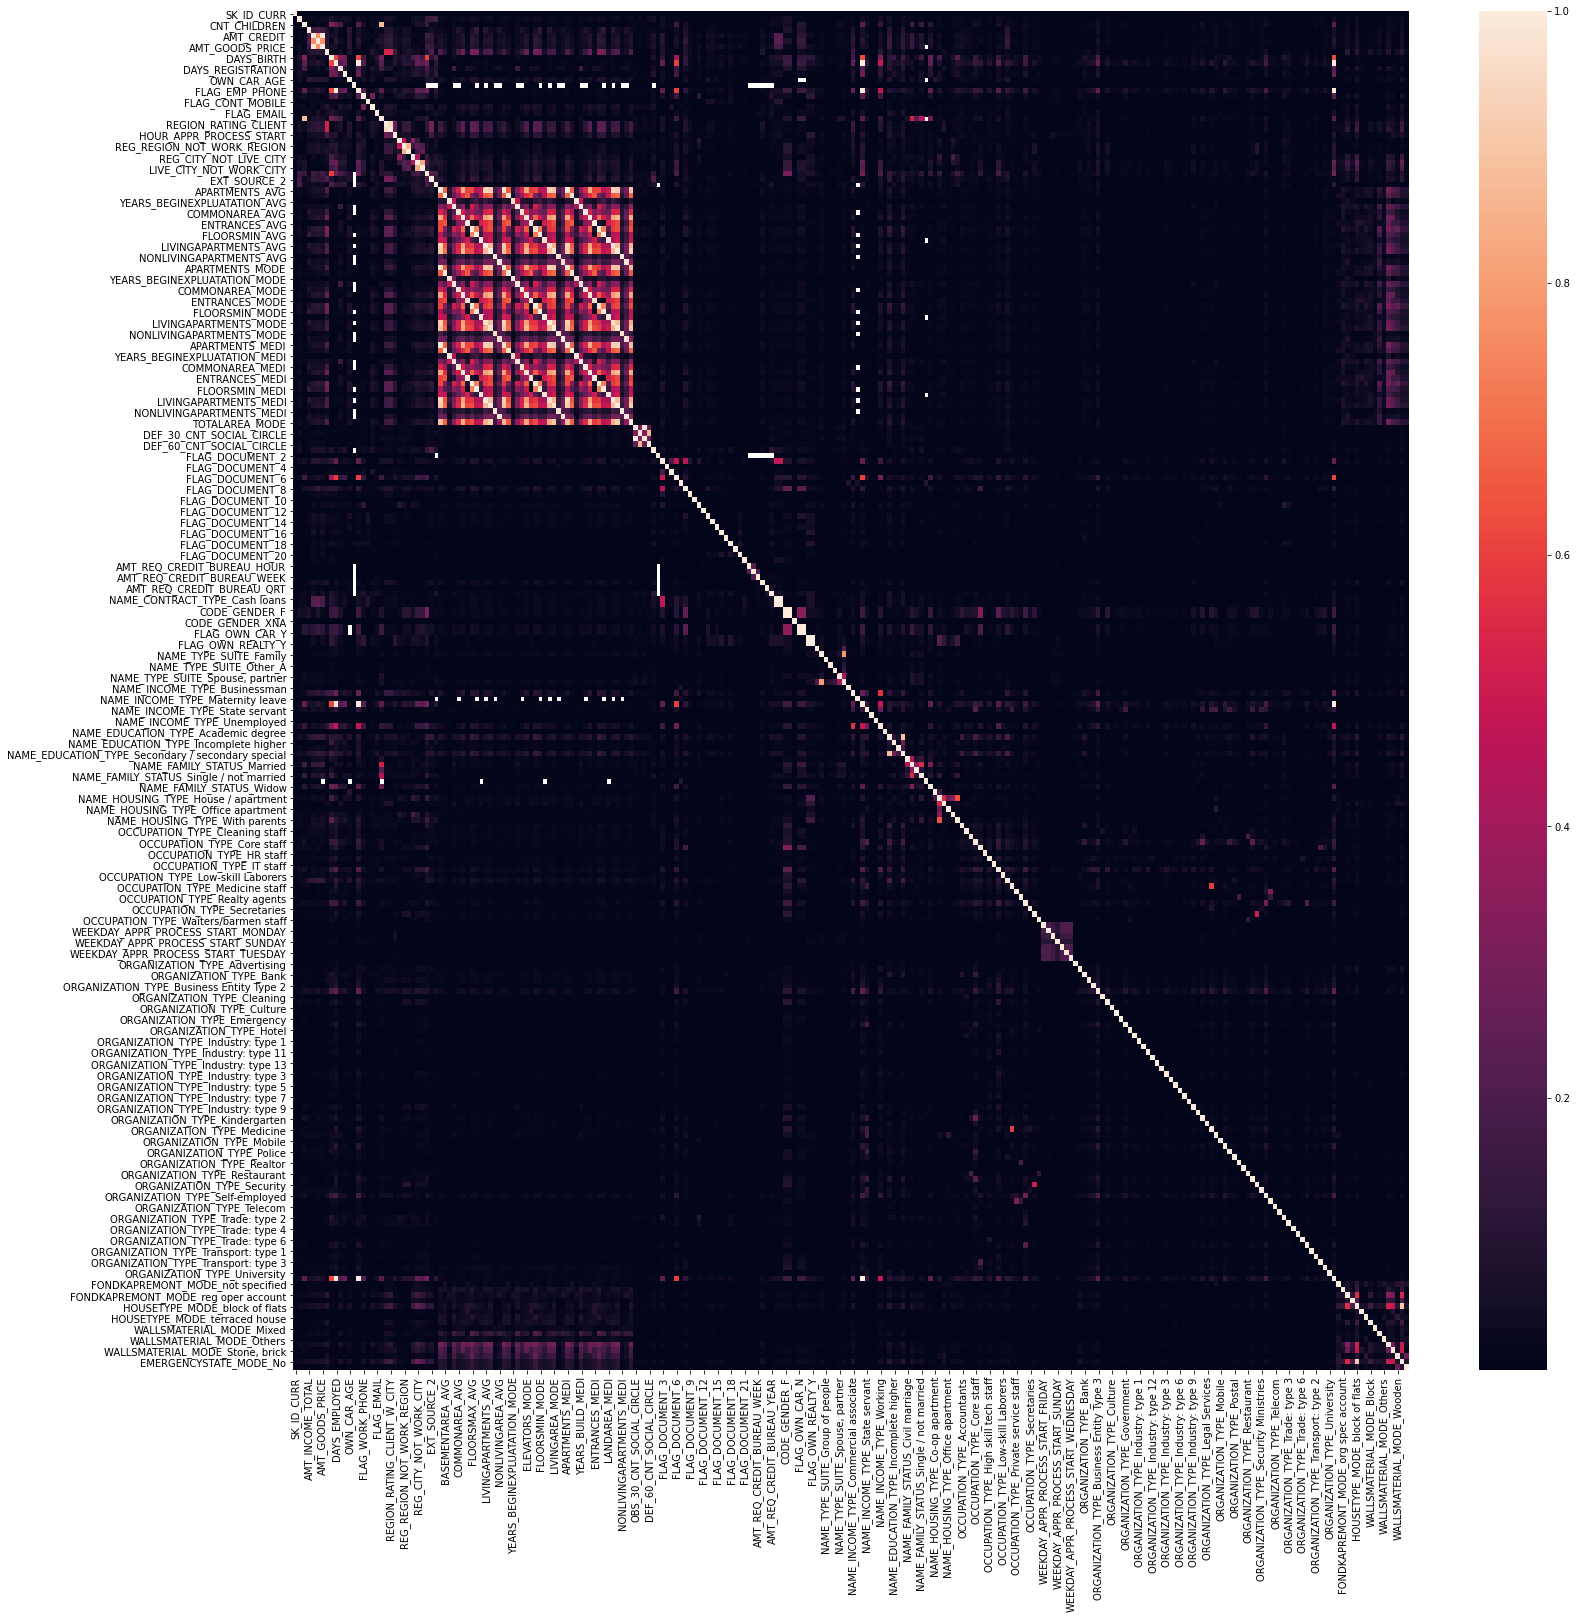

In [42]:
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(df_w_dumm.corr().abs())

In [43]:
df_w_dumm.corr().abs()['TARGET'].sort_values(ascending=False)

TARGET                                1.000000
EXT_SOURCE_3                          0.178919
EXT_SOURCE_2                          0.160472
EXT_SOURCE_1                          0.155317
DAYS_BIRTH                            0.078239
                                        ...   
NAME_HOUSING_TYPE_Co-op apartment     0.000312
ORGANIZATION_TYPE_Legal Services      0.000236
FLAG_DOCUMENT_20                      0.000215
ORGANIZATION_TYPE_Advertising         0.000117
ORGANIZATION_TYPE_Industry: type 7    0.000094
Name: TARGET, Length: 246, dtype: float64

In [61]:
count_class_0, count_class_1 = df_w_dumm_nafill['TARGET'].value_counts()
df_class_0 = df_w_dumm_nafill[df_w_dumm_nafill['TARGET'] == 0]
df_class_1 = df_w_dumm_nafill[df_w_dumm_nafill['TARGET'] == 1]

In [62]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
0    24825
1    24825
Name: TARGET, dtype: int64


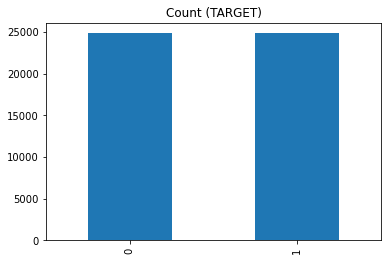

In [67]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [69]:
x = df_test_under.iloc[:,2:].values
y = df_test_under.iloc[:,1]

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [71]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  

In [72]:
metrics.mean_squared_error(y, y_pred)

0.2021845029785018

In [73]:
(y_pred>0.5).sum()

24538